# Анализ стоимости медицинской страховки 

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('insurance.csv')
df.shape

(1338, 7)

In [10]:
#Checking for nulls
nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())
#Dropping duplicates
df.drop_duplicates()


,age,sex,bmi,children,smoker,region,charges


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Исследование данных

### Корреляция между переменными

In [19]:
corr = df.select_dtypes('number').corr()

cmap = sns.diverging_palette(5, 250, as_cmap=True)

corr.style.background_gradient(cmap, axis=1)\
    .format(precision=3)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})


,age,bmi,children,charges
age,1.000,0.109,0.042,0.299
bmi,0.109,1.000,0.013,0.198
children,0.042,0.013,1.000,0.068
charges,0.299,0.198,0.068,1.000


#### Вывод: наибольшую корреляцию с расходами на медицинскую страховку показали возраст и индекс массы тела. Количество детей не показало серьезной корреляции с расходами.

### Расходы по регионам

<Axes: xlabel='region', ylabel='charges'>

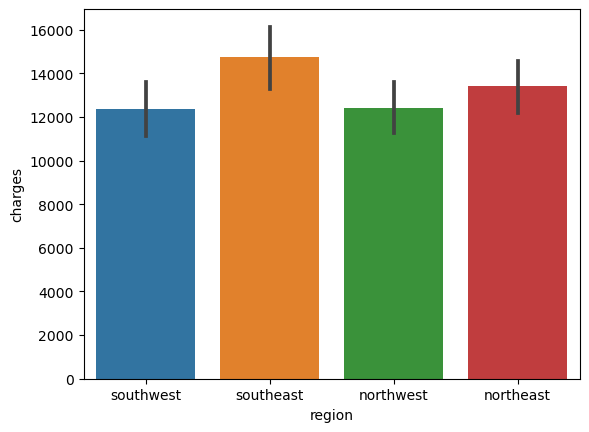

In [23]:
sns.barplot(df, x="region", y="charges")

#### Вывод: наиболее дорогая медицинская страховка на Юго-Востоке, однако, в остальных регионах стоимость страховки значительно не отличается.

### Расходы в зависимости от пола

<Axes: xlabel='sex', ylabel='charges'>

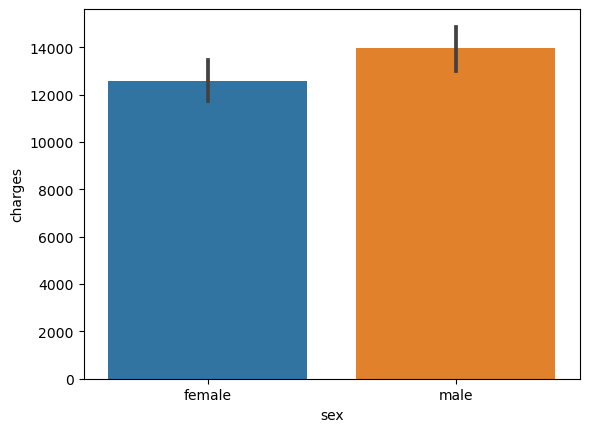

In [27]:
sns.barplot(df, x="sex", y="charges")

#### Вывод: мужчины тратят на медицинскую страховку больше, чем женщины

### Доля курильщиков у женщин и мужчин

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sex', ylabel='Count'>

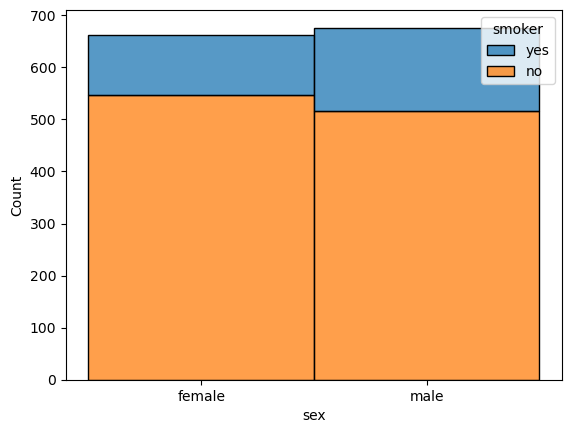

In [31]:
sns.histplot(data=df, x="sex", hue = "smoker", multiple = 'stack')

#### Вывод: доля курящих мужчин выше, что объясняет более высокую стоимость страховки для них

### Зависимость стоимости страховки от возраста

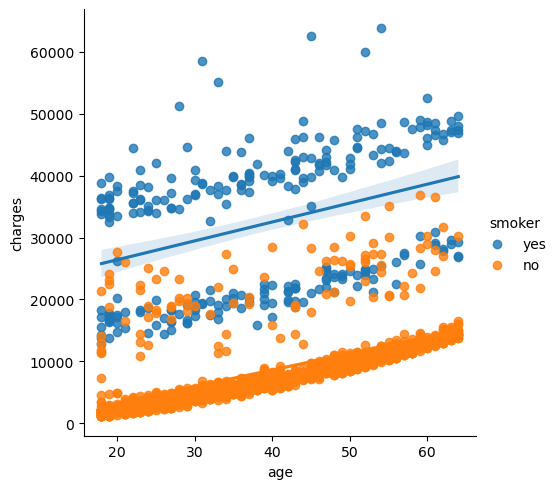

In [35]:
sns.lmplot(data=df, x="age", y="charges", hue = 'smoker')

#### Вывод: стоимость медицинской страховки с возрастом плавно возрастает и для курящих и для некурящих. Стоимость медицинской страховки для курильщиков значительно выше, чем для некурильщиков.

### Расходы по разным категориям ИМТ 

In [39]:
#Categories by bmi and charges by category
bins = [0, 18.5, 25, 30, 70]  # 0-4, 5-7, 8-10
labels = ['Underweight', 'Healthy', 'Overweight', 'Obese']
df['BMI Category'] = pd.cut(df['bmi'], bins=bins, labels=labels)
df[['bmi', 'BMI Category']].head(5)

,bmi,BMI Category
0,27.900,Overweight
1,33.770,Obese
2,33.000,Obese
3,22.705,Healthy
4,28.880,Overweight


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='BMI Category', ylabel='charges'>

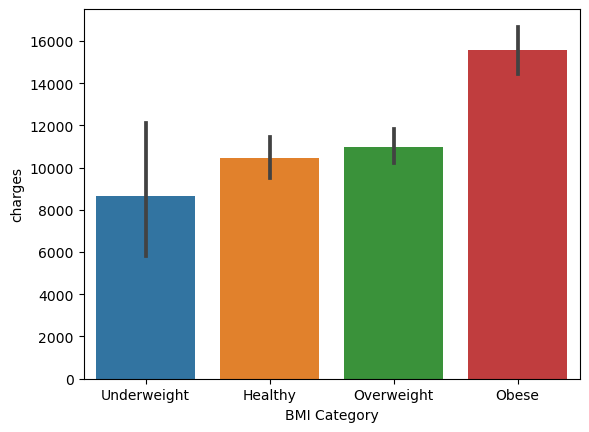

In [41]:
sns.barplot(df, x="BMI Category", y="charges")

#### Вывод: С увеличением индекса массы тела возрастает стоимость мед.страховки.

### Влияние курения на стоимость медицинской страховки

<Axes: xlabel='smoker', ylabel='charges'>

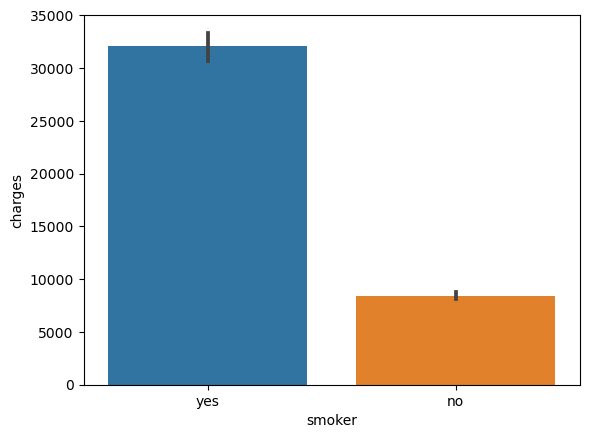

In [45]:
sns.barplot(df, x="smoker", y="charges")

#### Вывод: стоимость медицинской страховки для курильщиков в несколько раз выше, чем для некурящих.

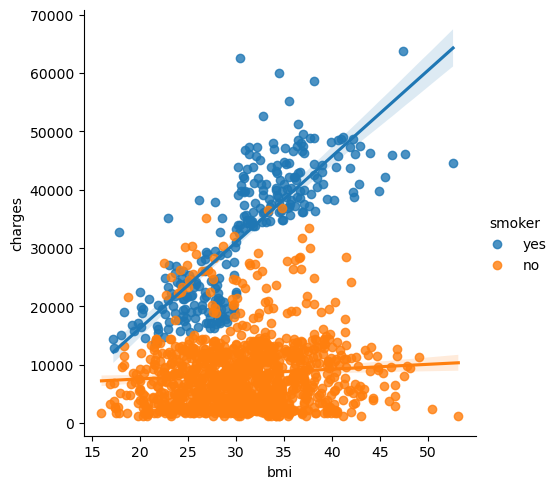

In [48]:
sns.lmplot(data=df, x="bmi", y="charges", hue = 'smoker')

#### Общий вывод: наиболее значимым фактором влияющим на стоимость медицинской страховки является курение. Также, сочетание высокого ИМТ и курения приводит к более стремительному увеличению стоимости медицинской страховки, чем высокий ИМТ сам по себе.

## Построение модели для предсказывания стоимости медицинской страховки

### 1. Перевод объектов в числовые значения

In [137]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df2 = pd.DataFrame(df)
df2['sex'] = df2['sex'].map({'male': 0, 'female': 1})
df2['smoker'] = df2['smoker'].map({'no': 0, 'yes': 1})
df2 = df2.drop(['BMI Category'], axis = 1)
# Encode multi-category variable (region)
df2 = pd.get_dummies(df2, columns=['region'], drop_first=True)

# Verify the encoded data
df2.head()


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


### 2. Разделим данные

In [140]:
from sklearn.model_selection import train_test_split
X = df2.drop('charges', axis=1)  
y = df2['charges']               
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Обучим модель

In [143]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [145]:
y_pred = model.predict(X_test)

### 4. Оценим модель

In [148]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 2529.056051002803
MSE: 20709235.36684647
RMSE: 4550.740090012444
R²: 0.8666060896739511


##### Значение R^2 близко к 1, что говорит о том, что модель довольно хорошо справляется со своей задачей.

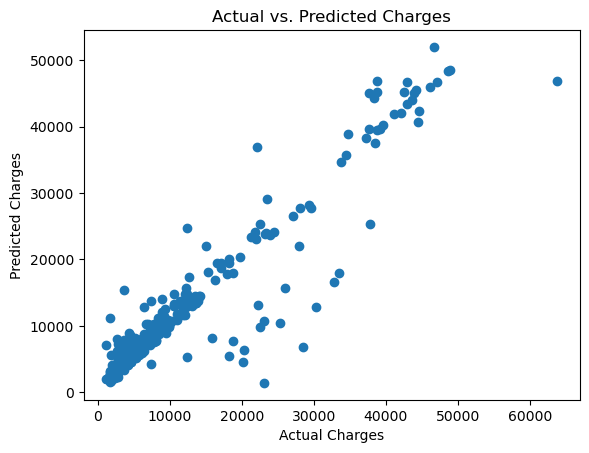

In [150]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")
plt.show()

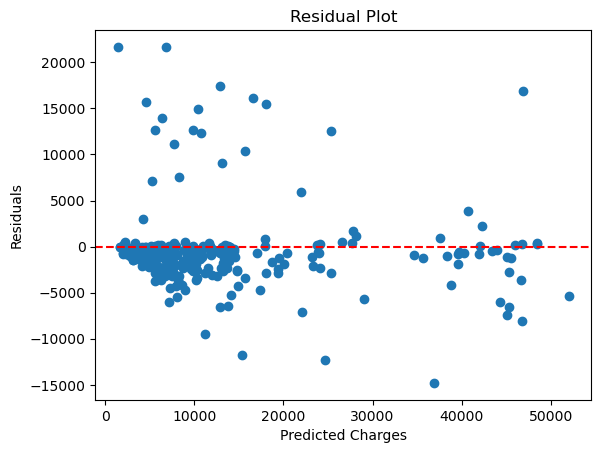

In [152]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

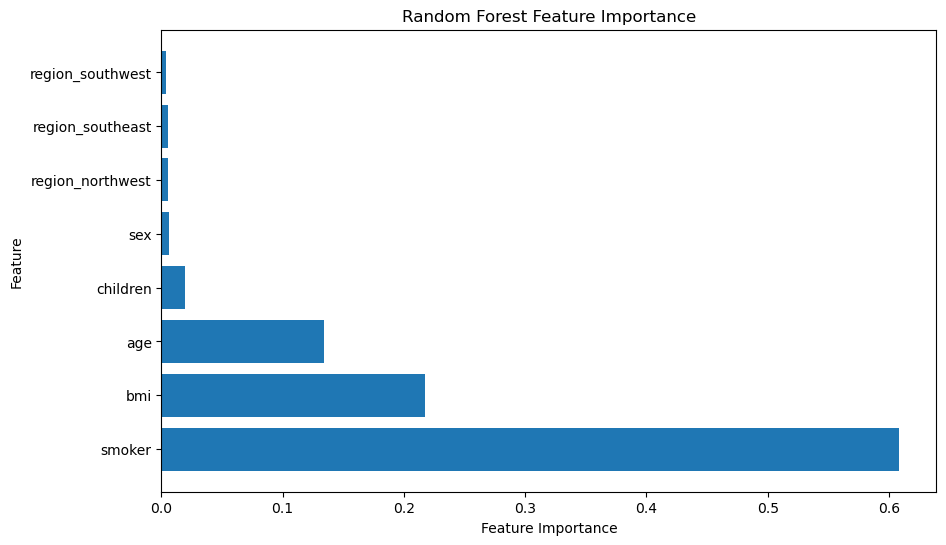

In [158]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()

#### Наиболее значимыми для определения стоимости медицинской страховки параметрами вновь оказались курение, ИМТ и возраст